<a href="https://colab.research.google.com/github/meabhaykr/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction

##### **Project Type**    - Classification
##### **Name**            - Abhay Kumar

# **Project Summary -**

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importing Metric Evaluation Libraries
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc
)

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
mobile_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Project/Mobile Price Range Prediction/Data mobile price range.csv')

### Dataset First View

In [4]:
# Dataset First Look
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
mobile_df.shape

(2000, 21)

In [6]:
num_rows = mobile_df.shape[0]
num_columns = mobile_df.shape[1]
print(f'The dataset contains \nNumber of rows : {num_rows} \nNumber of columns :{num_columns}')

The dataset contains 
Number of rows : 2000 
Number of columns :21


### Dataset Information

In [7]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicated_count = mobile_df.duplicated().sum()
duplicated_count

0

#### Dataset doesn't contain any duplicate values

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values_count = mobile_df.isnull().sum()
missing_values_count

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### There are no null values in the dataset

In [10]:
#Description of the data
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Anomalies, observed in attributes like front camera, primary camera, sc_width, and px_height, where minimum values of 0 are present, deviate from typical mobile device specifications. Addressing and rectifying these discrepancies is crucial to maintain the integrity of the data and ensure it aligns with realistic mobile device characteristics.

In [11]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
# Numerical Columns
Numerical_columns = mobile_df.describe().columns
Numerical_columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
# Categorical Columns
Categorical_columns = mobile_df.select_dtypes(include=['object','category']).columns
Categorical_columns

Index([], dtype='object')

##**Unique Value Check**

In [15]:
# Check Unique Values for each variable.
mobile_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

The target variable, Price Range, is a multiclass category with four distinct values.

##**Data Wrangling**

The presence of minimum values of 0 in attributes such as front camera, primary camera, sc_width, and px_height is inconsistent with the typical specifications of mobile devices, suggesting a potential data discrepancy. It is necessary to address and handle these anomalies to ensure the data accurately reflects realistic mobile device characteristics.

In [16]:
zero_fc_count = mobile_df.query('fc == 0').shape[0]
print(zero_fc_count)

474


The observations with a primary camera megapixel value of 0 might indicate mobile phones that lack a primary camera. It is essential to consider this scenario when interpreting the dataset, as a value of zero in this context could signify the absence of the primary camera feature rather than a data anomaly.

In [17]:
# Checking How many observations having Pixel Resolution Height value as 0.

print(mobile_df[mobile_df['px_height']==0].shape[0])

2


In [18]:
mobile_df[mobile_df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [19]:
# Dropping these 2 rows and again resetting the index

mobile_df.drop([1481,1933],axis=0,inplace=True)
mobile_df.reset_index(drop=True, inplace=True)

In [20]:
# Checking How many observations having Screen Width value as 0.

print(mobile_df[mobile_df['sc_w']==0].shape[0])

179


It is highly unlikely for a mobile phone's screen width (Sc_width) to be 0, and the presence of 179 such records suggests a potential data issue. Imputation or correction methods should be applied to address these anomalies and ensure the dataset accurately reflects realistic values for mobile device attributes.

**Replacing Null Values**

In [21]:
# Replacing 0 with NAN so that we can implement KNN Imputer.

mobile_df['sc_w'].replace(0,np.nan,inplace=True)

Utilizing the KNN method for imputation, the KNN Imputer takes into account the values of the k-nearest neighbors to estimate and fill in missing values for each data point within the specified column. This approach leverages the information from neighboring data instances to enhance the accuracy of imputed values in the dataset

In [22]:
# import KNN imputer from sklearn

from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_df=pd.DataFrame(impute_knn.fit_transform(mobile_df),columns = mobile_df.columns)

In [23]:
# Checking How many observations having sc_w value as 0.

mobile_df[mobile_df['sc_w']==0].shape[0]

0

In [24]:
mobile_df.shape

(1998, 21)

**All inconsistencies in the dataset, including rectifying values that deviated from expected ranges, have been addressed and corrected.**}

## **Outlier Detection**

Outliers refer to data points that exhibit substantial deviation from the typical pattern observed in the majority of the dataset. These exceptional data points reside considerably distant from the central tendency, positioned either at the extremes of the value range, higher or lower than the typical distribution

In [25]:
# Creating the list Columns which may contain outliers
possible_outlier_columns = mobile_df.select_dtypes(include='number').columns.tolist()
possible_outlier_columns = [col for col in possible_outlier_columns if col not in {'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'}]
possible_outlier_columns

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

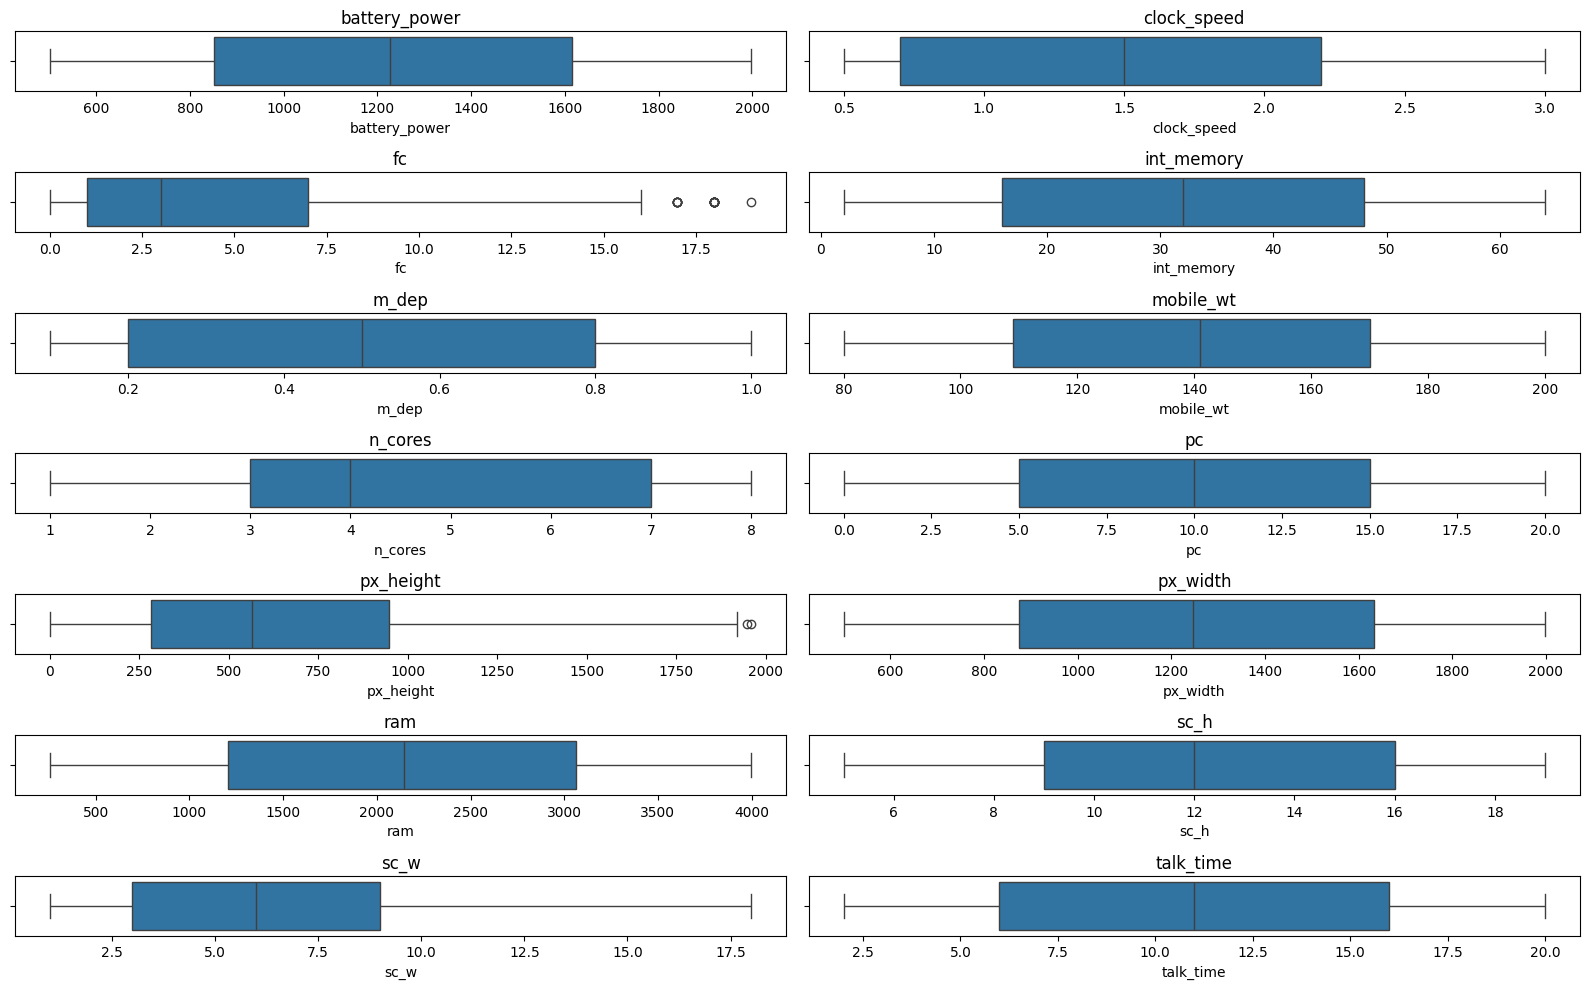

In [26]:
plt.figure(figsize=(16, 10))

num_cols = 2
num_rows = len(possible_outlier_columns) // num_cols + len(possible_outlier_columns) % num_cols

for index, item in enumerate(possible_outlier_columns):
    plt.subplot(num_rows, num_cols, index+1)
    sns.boxplot(x=mobile_df[item])
    plt.title(item)

plt.tight_layout()
plt.show()


**Outliers are observed in the 'fc' and 'px_width' columns based on the boxplot visualizations.**

In [27]:
# Creating a list of Columns that contain Outliers

Col_with_outliers = ['fc','px_height']
Col_with_outliers


['fc', 'px_height']

In [31]:
Q1 = mobile_df[Col_with_outliers].quantile(0.25)
Q3 = mobile_df[Col_with_outliers].quantile(0.75)
IQR = Q3-Q1
IQR.T

fc             6.00
px_height    663.75
dtype: float64

In [32]:
# Calculating the Upperside and Lowerside Outlier

Upper_Whisker = Q3 + (1.5*IQR)
Lower_Whisker = Q1 - (1.5*IQR)

In [33]:
Upper_Whisker

fc             16.000
px_height    1943.375
dtype: float64

In [34]:
Lower_Whisker

fc            -8.000
px_height   -711.625
dtype: float64

In [35]:
# Filtering the outliers from the dataframe

mobile_df[Col_with_outliers] = mobile_df[Col_with_outliers][~((mobile_df[Col_with_outliers] < Lower_Whisker) | (mobile_df[Col_with_outliers] > Upper_Whisker))]

In [36]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1980 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

In [37]:
# Replacing the null values which created due to outlier removal

mobile_df['fc'].fillna(mobile_df['fc'].median(),inplace=True)
mobile_df['px_height'].fillna(mobile_df['px_height'].median(),inplace=True)

**These columns  have skewed distributions or the presence of outliers. When dealing with skewed data or outliers, mean imputation can be sensitive to extreme values, potentially leading to biased results. In such cases, using the median as a central measure is more robust, as it is less affected by extreme values.**

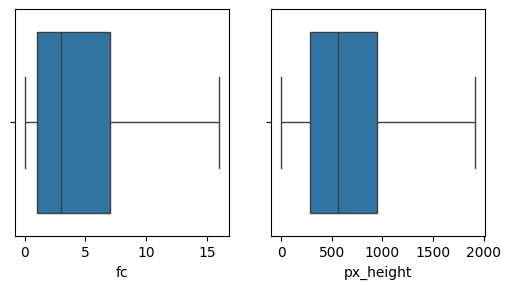

In [38]:
plt.figure(figsize=(16,10))
for index,item in enumerate(Col_with_outliers):
  plt.subplot(3,5,index+1)
  sns.boxplot(x=mobile_df[item], data=mobile_df)

**I have effectively eliminated the outliers**.

##**Feature Engineering**

In [39]:
# Creating a new feature based on given features sc_h  and sc_w  to represent overall Display Size

mobile_df['Display_size'] = mobile_df['sc_h'] * mobile_df['sc_w']

In [40]:
# Creatin a new feature based on given features px_height and px_width to represent Display Resolution area

mobile_df['Total_Pixels'] = mobile_df['px_height'] * mobile_df['px_width']

In [41]:
# Dropping unnecessary columns from the dataset

mobile_df.drop(['sc_h','sc_w','px_height','px_width'],axis=1,inplace=True)

In [42]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  ram            1998 non-null   float64
 12  talk_time      1998 non-null   float64
 13  three_g        1998 non-null   float64
 14  touch_screen   1998 non-null   float64
 15  wifi           1998 non-null   float64
 16  price_range    1998 non-null   float64
 17  Display_size   1998 non-null   float64
 18  Total_Pi

In [43]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,Display_size,Total_Pixels
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,2549.0,19.0,0.0,0.0,1.0,1.0,63.0,15120.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,2631.0,7.0,1.0,1.0,0.0,2.0,51.0,1799140.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,2603.0,9.0,1.0,1.0,0.0,2.0,22.0,2167308.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,2769.0,11.0,1.0,0.0,0.0,2.0,128.0,2171776.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1411.0,15.0,1.0,1.0,0.0,1.0,16.0,1464096.0


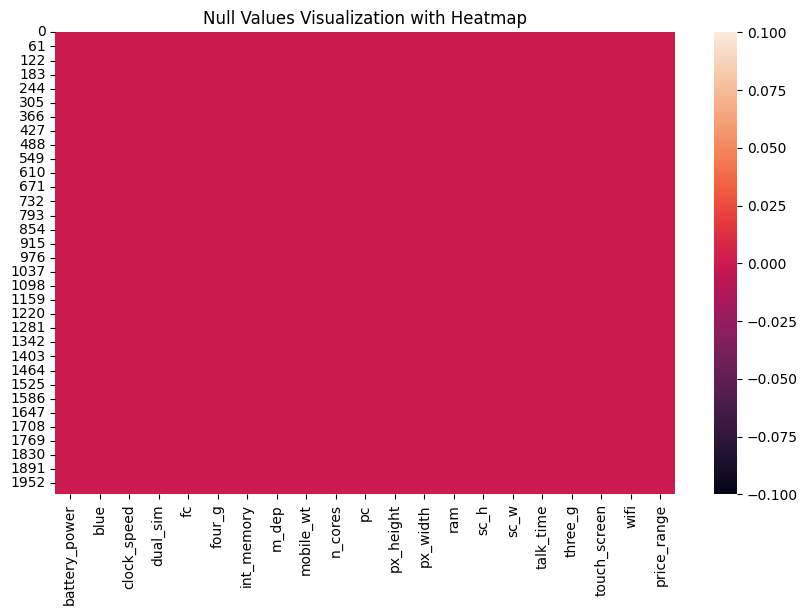

In [14]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(mobile_df.isnull())
plt.title('Null Values Visualization with Heatmap')
plt.show()

The dataset comprises 2,000 records distributed across 21 columns, exhibiting a clean structure with no instances of null values or duplicated entries.